## Crime Rhythm Maps

Exploring crime patterns with Ryhthm Maps, heat maps with two time dimensions. 


A Rhythm map is a something something something. 

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import rowgenerators as rg
import publicdata as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%run ../lib/crime.py

In [2]:
# Clarinova Place Codes, short names for San Diego places
cpc = rg.dataframe('gs://1tvXZKjyh5tdKHF2TUbQvW0hJoSjoG6dK4pA2SD-2pu4#1') #Google Spreadsheet
cpc.head()

,type,city,code,scode,name,lon,lat,area
0,community,CaSanSAN,SanBAL,1,Balboa Park,-117.145961,32.731125,5.660046e+07
1,community,CaSanSAN,SanBAR,2,Barrio Logan,-117.137436,32.694515,2.403189e+07
2,community,CaSanSAN,SanBLA,13,Black Mountain Ranch,-117.140476,32.998323,2.217494e+08
3,community,CaSanSAN,SanCAR,21,Carmel Valley,-117.220342,32.944326,1.971276e+08
4,community,CaSanSAN,SanCLA,6,Clairemont Mesa,-117.194832,32.816374,3.719664e+08


In [3]:
incidents = rg.dataframe('http://s3.sandiegodata.org/repo/clarinova.com/crime-incidents-casnd-7ba4-r3/incidents-csv.zip')

# Merge in the community codes to get the community names
incidents = incidents[incidents.community!='NONE']\
            .merge(cpc[['name','code']], left_on='community', right_on='code', how='left')



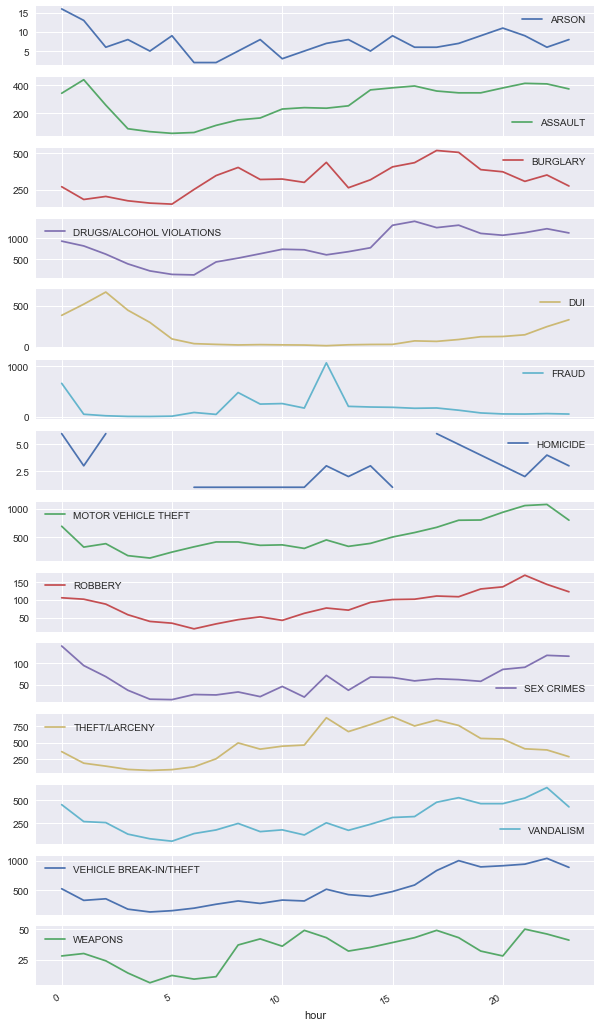

In [4]:
dfm= incidents.groupby(['hour','type'])
counts = dfm.count()
cus = counts.unstack(1)
uscounts = cus['id']
ax = uscounts.plot(subplots=True, figsize=(10,20))

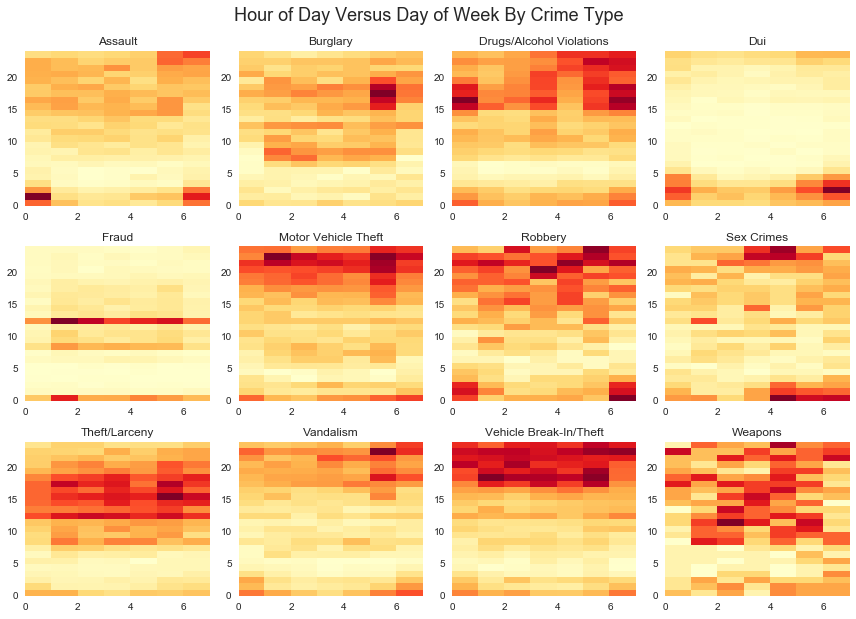

In [5]:

fig = plot_heat_grid(incidents, 'Hour of Day Versus Day of Week By Crime Type')


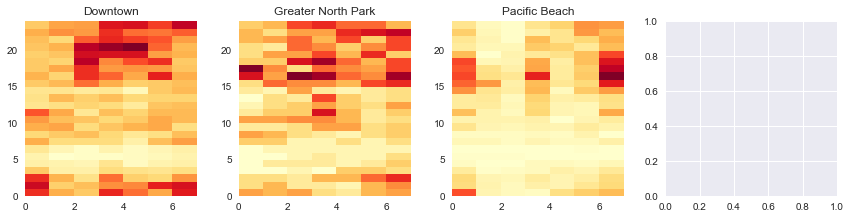

In [6]:

            
plot_heat_grid_community(incidents[incidents.type =='DRUGS/ALCOHOL VIOLATIONS'],
                         communities= ['SanDOW','SanGRE','SanPCF'])
            

In [7]:
incidents.head().T

,0,1,2,3,4
id,,,,,
date,2007-01-01,2007-01-01,2007-01-01,2007-01-01,2007-01-01
year,2007,2007,2007,2007,2007
month,1,1,1,1,1
day,2557,2557,2557,2557,2557
week,1,1,1,1,1
dow,1,1,1,1,1
time,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
hour,0,0,0,0,0
is_night,1,1,1,1,1
